# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import numpy as np

# Local data

In [2]:
df = pd.read_csv('raw/imd_extract_platform.csv', delimiter=';', decimal = ',')

In [3]:
df

,Any,C. D'ARAGÓ,C. DE MALLORCA,C. DE VALÈNCIA,GRAN VIA DE LES CORTS CATALANES,R.G. MITRE (BESÒS),R.G. MITRE (LLOBREGAT),C. D'ARIBAU,C. D'ENTENÇA,C. DE BALMES,C. DE MUNTANER,C. DE NUMÀNCIA
0,2018,84560.66667,16875.83000,31563.66667,58983.27273,24804.66667,19760.20000,23741.41667,13339.75000,35593.91917,25939.91667,29615.54167
1,2019,84251.54545,17795.33333,31408.92333,55321.27667,24779.33333,20241.33333,22817.41667,13999.66667,33366.88583,25022.18182,27370.41667
2,2020,60860.00000,16039.14417,22877.16667,42522.16667,19778.75000,17426.75000,17177.75000,11090.08333,23713.40500,18823.08333,18205.41917
3,2021,53182.33333,22062.50000,26026.54545,51316.91667,22322.58333,19186.25000,18752.50000,12073.07667,28152.16667,21157.33333,22455.54545
4,2022,62100.83333,23431.36667,28079.83333,51801.58333,22680.66667,19570.08333,19286.58333,14251.33333,30718.83333,18675.83333,23750.33333
5,2023,58958.91667,22138.63636,27418.58333,52459.83333,23479.75000,19087.00000,21802.33333,12148.83333,29844.83333,18746.72727,27055.08333
6,2024,59193.11111,16932.37500,27088.66667,53332.55556,22913.88889,18625.11111,21764.55556,11924.22222,29708.11111,17388.88889,24133.11111


In [4]:
df = pd.DataFrame(df.set_index('Any').unstack())
df.reset_index(inplace=True)
df.columns = ['NAME', 'year', 'AAWT']

In [5]:
ref = gpd.read_file('raw/custom_barcelona_referential.geojson')
ref

,NAME,geometry
0,C. D'ARAGÓ,"LINESTRING (2.17178 41.39743, 2.14613 41.37819)"
1,C. DE MALLORCA,"LINESTRING (2.16879 41.3986, 2.15312 41.38675)"
2,C. DE VALÈNCIA,"LINESTRING (2.15417 41.38591, 2.17025 41.3979)"
3,GRAN VIA DE LES CORTS CATALANES,"LINESTRING (2.15029 41.37595, 2.16685 41.38841)"
4,C. D'ARIBAU,"LINESTRING (2.15937 41.38838, 2.15186 41.3941)"
5,C. D'ENTENÇA,"LINESTRING (2.14918 41.38065, 2.14289 41.38541)"
6,C. DE BALMES,"LINESTRING (2.14786 41.401, 2.15082 41.39888, ..."
7,C. DE MUNTANER,"LINESTRING (2.14335 41.39875, 2.14932 41.39425)"
8,C. DE NUMÀNCIA,"LINESTRING (2.13535 41.38676, 2.13895 41.3833)"


In [6]:
df = ref.set_index('NAME').join(df.set_index('NAME'), how = 'inner')

In [7]:
df = df.reset_index().rename(columns = {'NAME':'raw_name'})

# Map Matching with OSM

In [8]:
import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from map_matching_OSM import lines_matching

In [9]:
# Custom geometries are long lines so it takes time
df = lines_matching(df)

Main graph loaded
Node 2007676329 not reachable from 928996468
Node 1218605980 not reachable from 1224368798
Node 1307474761 not reachable from 1224368798
Node 1218605980 not reachable from 1224368798
Node 2007676329 not reachable from 1224368798
Node 2007676329 not reachable from 928996468
Node 1218605980 not reachable from 1224368798
Node 1307474761 not reachable from 1224368798
Node 1218605980 not reachable from 1224368798
Node 2007676329 not reachable from 1224368798
Node 2007676329 not reachable from 928996468
Node 1218605980 not reachable from 1224368798
Node 1307474761 not reachable from 1224368798
Node 1218605980 not reachable from 1224368798
Node 2007676329 not reachable from 1224368798
Node 2007676329 not reachable from 928996468
Node 1218605980 not reachable from 1224368798
Node 1307474761 not reachable from 1224368798
Node 1218605980 not reachable from 1224368798
Node 2007676329 not reachable from 1224368798
Node 2007676329 not reachable from 928996468
Node 1218605980 not r

In [10]:
df[['raw_name', 'osm_name']].drop_duplicates()

,raw_name,osm_name
0,C. D'ARAGÓ,Carrer d'Aragó
7,C. DE MALLORCA,Carrer de Mallorca
14,C. DE VALÈNCIA,Carrer de València
21,GRAN VIA DE LES CORTS CATALANES,Gran Via de les Corts Catalanes
28,C. D'ARIBAU,Carrer d'Aribau
35,C. D'ENTENÇA,Carrer d'Entença
42,C. DE BALMES,Carrer de Balmes
49,C. DE MUNTANER,Carrer de Muntaner
56,C. DE NUMÀNCIA,Carrer de Numància


# Final Saving

In [11]:
for year in df.year.unique():
    sub = df[df.year == year]
    # Save
    sub[['AAWT', 'geometry', 'raw_name', 'osm_name', 'osm_type', 'osm_lanes', 'osm_oneway', 'osmid']].to_file(f'treated/Barcelona_AAWT_{year}.geojson', index = False)

# Regional Data (not used)

In [24]:
df = pd.read_csv('raw/Intensitat_Mitjana_Di_ria_de_Vehicles_a_les_carreteres.csv')

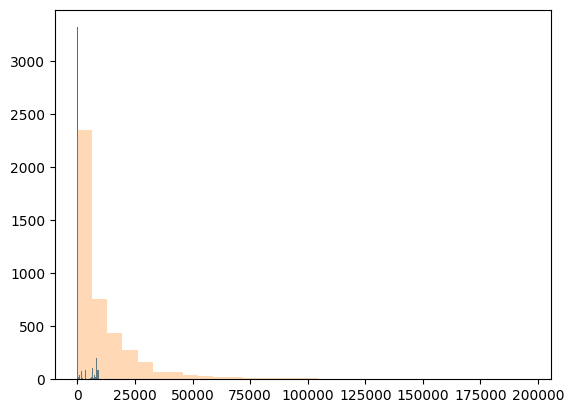

In [25]:
plt.hist(df.IFA, bins = 30)
plt.hist(df.IMD, bins = 30, alpha = .3)
plt.show()

In [26]:
print(df.columns)

df.columns = ['Year', 'Code', 'Road', 'Pk', 'Station Type', 'Data Source',
 'Population', 'Region', 'Origin Section Definition', 'Final Section Definition',
 'PK Start', 'PK End', 'Section Length', 'Technical Classification',
 'Functional Classification', 'Lanes', 'IFA', 'IMD', '% Heavy Vehicles',
 'Speed Km/h', 'Year 1', 'Latitude', 'Longitude']

Index(['Any', 'Codi', 'Carretera', 'Pk', 'Tipus estació', 'Font Dades',
       'Població', 'Comarca', 'Definició Tram Origen', 'Definició Tram Final',
       'PK inici', 'PK final', 'Longitud Tram', 'Classificació tècnica',
       'Classificació funcional', 'Carrils', 'IFA', 'IMD', '% Pesants',
       'Velocitat Km / h', 'Any 1', 'Latitud', 'Longitud'],
      dtype='object')


In [27]:
df.Year.unique()

array([2018, 2020, 2021, 2022, 2017, 2019], dtype=int64)

In [28]:
df['Station Type'].unique()

array(['Cobertura', 'Primària', 'Secundària', 'Permanent'], dtype=object)

In [29]:
df.rename(columns= {
     'IMD' : 'AADT', 
     '% Heavy Vehicles' : 'TR_pct_AADT', 
     'Speed Km/h' : 'savg',
}, inplace=True)

df.dropna(subset = ['AADT'], inplace=True)

In [30]:
df = gpd.GeoDataFrame(
    df[['Year' ,'AADT', 'TR_pct_AADT', 'savg']],
    geometry = gpd.points_from_xy(df.Longitude, df.Latitude),
    crs = 'epsg:4326'
)

In [31]:
df

,Year,AADT,TR_pct_AADT,savg,geometry
0,2018,177,0.01,60.40,POINT (1.00289 41.29130)
1,2020,177,0.01,60.40,POINT (1.00289 41.29130)
2,2021,177,0.01,60.40,POINT (1.00289 41.29130)
3,2022,177,0.01,60.40,POINT (1.00289 41.29130)
4,2017,1782,0.05,86.86,POINT (1.41276 41.63550)
...,...,...,...,...,...
4292,2020,44,0.00,42.89,POINT (0.35365 41.15009)
4293,2021,44,0.00,42.89,POINT (0.35365 41.15009)
4294,2017,277,0.00,59.45,POINT (0.35365 41.15009)
4295,2018,277,0.00,59.45,POINT (0.35365 41.15009)


In [35]:
#df[df.Year == 2022].explore('AADT', style_kwds = {'weight':6}, vmax = 25000)